In [144]:
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
import random
import matplotlib.pyplot as plt

In [104]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [171]:
data = pd.read_csv(os.path.join('shared_documents','clean_data_updated.csv'))
data = data[data['OUTLIERS']!=1]
data = data[:-1]
data = data[(data['Status']=='Open')|(data['Status']=='New')]
data

/opt/tljh/user/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (27,82) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Opportunity ID,Line Nbr.,Inventory ID,Year,Unit Price,Quantity,UOM,Ext. Price,Currency,Discount Amount,...,But en Or St Etienne,Campus,Gala St Etienne,But en Or Londres,Gala Grenoble,But en Or Grenoble,Cluster,PROBS,CR,OUTLIERS
0,6387.0,1.0,EVEN001,2023.0,9000.0,1.0,PIECE,9000.0,EUR,0.0,...,0,0,0,0,0,0,54,0.068182,0.999810,0
1,6386.0,1.0,EVEN001,2023.0,9000.0,1.0,PIECE,9000.0,EUR,0.0,...,0,0,0,0,0,0,54,0.068182,0.999810,0
2,6385.0,1.0,DONPAR,2023.0,140.0,1.0,PIECE,140.0,EUR,0.0,...,0,0,0,0,0,0,18,0.476190,0.468770,0
3,6384.0,1.0,DONPAR,2023.0,350.0,1.0,PIECE,350.0,EUR,0.0,...,0,0,0,0,0,0,18,0.476190,0.468770,0
4,6383.0,1.0,DONPAR,2023.0,120.0,1.0,PIECE,120.0,EUR,0.0,...,0,0,0,0,0,0,18,0.476190,0.468770,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,1477.0,1.0,MECENAT,2021.0,5000.0,1.0,PIECE,5000.0,EUR,0.0,...,1,0,1,0,0,0,4,0.510460,-140.555479,0
4554,1455.0,1.0,MECENAT,2021.0,30000.0,1.0,PIECE,30000.0,EUR,0.0,...,0,0,0,0,0,0,2,0.741176,0.139376,0
4556,1453.0,1.0,MECENAT,2021.0,5000.0,1.0,PIECE,5000.0,EUR,0.0,...,0,0,0,0,0,0,49,0.515789,0.333269,0
4566,1442.0,1.0,MECENAT,2021.0,20000.0,1.0,PIECE,20000.0,EUR,0.0,...,0,0,0,0,0,0,65,0.161290,0.999908,0


In [172]:
for column in data.columns:
    print(column)

Opportunity ID
Line Nbr.
Inventory ID
Year
Unit Price
Quantity
UOM
Ext. Price
Currency
Discount Amount
Discount, %
Funded Program
Free Item
Tax Category_x
Business Account
Contact ID
Estimated Close Date
Status
Stage
Probability
Estimated amount
Amount received
Difference
Owner Name_x
Follow-up with_x
Class ID
Class_x
Source
Source Campaign
Campaign Name
Programme financé
Action financée
Agreement
Signature date of the agreement
Agreement expiry date
Duration of agreement (months)
Deadline for submission of interim report
Final report deadline
Type de contrat
Type de financement
Zone SDLV
Theorical payment date 1
Theorical payment amount 1
Theorical payment date 2
Theorical payment amount 2
Theorical payment date 3
Theorical payment amount 3
Theorical payment date 4
Theorical payment amount 4
Theorical payment date 5
Theorical payment amount 5
Created On_x
Last Modified Date
Actual Close Date
Assignment Date
Branch ID
Description EN
Posting Class
Tax Category_y
Base Unit
Item Status
Cr

In [192]:
def cost_function(thereshold):
    '''
    In this fuction, called 'cost_function' will calculate the cost, which in our case is the Gain of the ONG.
    '''
    bernoulli_series = np.random.binomial(n=1, p=data['PROBS'])
    weights = (data['CR']>thereshold)
    cost = (weights*(bernoulli_series*data['CR']-1)*data['Estimated amount']).sum()
    return cost-10*(sum(weights)-2000)**2

def get_prediction(thereshold):
    bernoulli_series = np.random.binomial(n=1, p=data['PROBS'])
    weights = (data['CR']>thereshold)
    return weights*(bernoulli_series*data['CR']

In [195]:
results = []
values = []
for thereshold in np.linspace(0,1,10):
    results.append(np.quantile([cost_function(thereshold) for _ in range(100)], 0.95))

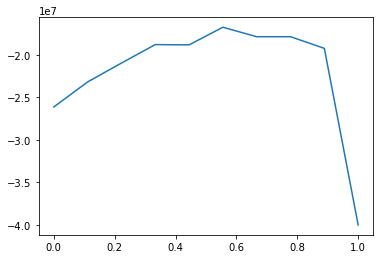

In [196]:
plt.plot(np.linspace(0,1,10),results)

In [197]:
a = [cost_function(thereshold) for _ in range(500)]

In [198]:
a

[-40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -40000000.0,
 -4000